# Lab 10

## I. Hill Climbing


The Hill Climbing Method is a simple optimization algorithm that tries to find the optimal solution to a problem by iteratively improving the current solution. It is a local search algorithm, which means that it only considers the solutions that are in the neighborhood of the current solution.

Here's how the Hill Climbing Method works:

1. Start with an initial state -- a candidate to the solution of the problem.

2. Evaluate the current state to determine its quality or fitness.

3. Generate a set of neighboring states by making small modifications to the current one.

3. Evaluate the fitness of each neighboring state.

4. Select the best neighboring state and make it the new current one.

5. Repeat steps 3 to 5 until no further improvement can be made or a predefined stopping criterion is met.

One of the main advantages of the Hill Climbing Method is its simplicity and ease of implementation. 

Consider the Bukin funcion N6, from the basic optimisation benchmark set:

$$f(x,y) =  100 \sqrt{|y-0.01 x^2|}+ 0.01 |x+10|.$$

For $-15 \leqq x \leqq -5$ and $-3 \leqq y \leqq 3$ we have a minimum point $f(-10, 1) = 0$.


*Ex. 1:*

Implement a function $f$ for this function and represent it graphic using matplotlib.

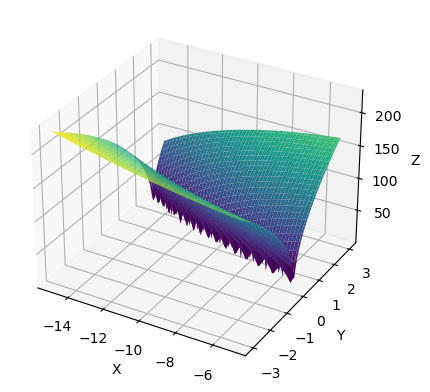

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def bukin(x, y):
    return 100*np.sqrt(np.abs(y - 0.01*x**2)) + 0.01*np.abs(x + 10)

x = np.linspace(-15, -5, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = bukin(X, Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

*Ex. 2:* 

Write a Hill Climbing algorithm that finds this functions minimum.

Hints: 

define a state, define a neighbour, choose a proper stop criteria before implementing the algorithm.

In [39]:
import numpy as np
import random

def bukin(x, y):
    return 100*np.sqrt(np.abs(y - 0.01*x**2)) + 0.01*np.abs(x + 10)

state = (-10, 0)

x_range = (-15, -5)
y_range = (-3, 3)

step_size = 0.1

max_iterations = 1000
tolerance = 1e-6

def get_neighbors(state):
    neighbors = []
    for dx in [-step_size, 0, step_size]:
        for dy in [-step_size, 0, step_size]:
            neighbor = (state[0] + dx, state[1] + dy)
            if neighbor[0] >= x_range[0] and neighbor[0] <= x_range[1] and neighbor[1] >= y_range[0] and neighbor[1] <= y_range[1]:
                neighbors.append(neighbor)
    return neighbors

for i in range(max_iterations):
    current_fitness = bukin(state[0], state[1])
    neighbors = get_neighbors(state)

    neighbor_fitness = [bukin(n[0], n[1]) for n in neighbors]

    best_neighbor_fitness = np.min(neighbor_fitness)

    if best_neighbor_fitness < current_fitness:
        # randomly select a neighbor with the same fitness
        best_neighbors = [n for n in neighbors if bukin(n[0], n[1]) == best_neighbor_fitness]
        best_neighbor = random.choice(best_neighbors)
        state = best_neighbor

        if np.abs(current_fitness - best_neighbor_fitness) < tolerance:
            print(f"Optimal solution found after {i+1} iterations: {state} with fitness {best_neighbor_fitness}")
            break
    else:
        print(f"No further improvement possible after {i+1} iterations: {state} with fitness {current_fitness}")
        break

No further improvement possible after 12 iterations: (-8.900000000000004, 0.7999999999999999) with fitness 8.899194417315162


*Ex. 3:* for 1 point 

Implement a hill climbing algorithm for the knapsack problem. 

Hints:
For n elements:

we begin with an empty string of n zeros.

a neighbour is constructed by switching of zero into an one at a position in the array

Does it find the optimum? 


In [18]:
import random

def knapsack_hill_climbing(values, weights, capacity, max_iterations):
    n = len(values)
    current_solution = [0] * n
    current_value = 0
    
    for i in range(n):
        if current_solution[i] == 1:
            current_value += values[i]
    
    best_solution = current_solution.copy()
    best_value = current_value
    
    for i in range(max_iterations):
        neighbors = []
        for j in range(n):
            if current_solution[j] == 0:
                neighbor = current_solution.copy()
                neighbor[j] = 1
                neighbors.append(neighbor)
            else:
                neighbor = current_solution.copy()
                neighbor[j] = 0
                neighbors.append(neighbor)

        neighbor_values = []
        for neighbor in neighbors:
            neighbor_value = 0
            neighbor_weight = 0
            for j in range(n):
                if neighbor[j] == 1:
                    neighbor_value += values[j]
                    neighbor_weight += weights[j]
            if neighbor_weight <= capacity:
                neighbor_values.append(neighbor_value)
            else:
                neighbor_values.append(0)
        
        best_neighbor_index = neighbor_values.index(max(neighbor_values))
        if neighbor_values[best_neighbor_index] > current_value:
            current_solution = neighbors[best_neighbor_index]
            current_value = neighbor_values[best_neighbor_index]
        
        if current_value > best_value:
            best_solution = current_solution.copy()
            best_value = current_value
    
    return best_solution, best_value

values = [5, 1, 8, 3, 2]
weights = [4, 1, 2, 3, 5]
capacity = 7
max_iterations = 1000

solution, value = knapsack_hill_climbing(values, weights, capacity, max_iterations)

print("Solution:", solution)
print("Value:", value)

Solution: [1, 1, 1, 0, 0]
Value: 14



*Ex. 4:* for 1 point

Improve it to increase the chances of finding the solution.

In [33]:
import random

def knapsack_hill_climbing(values, weights, capacity, max_iterations, max_restarts):
    n = len(values)
    best_solution = [0] * n
    best_value = 0
    
    for restart in range(max_restarts):
        current_solution = [random.choice([0, 1]) for _ in range(n)]
        current_value = sum([values[i] for i in range(n) if current_solution[i] == 1])
        
        for i in range(max_iterations):
            neighbors = []
            for j in range(n):
                if current_solution[j] == 0:
                    neighbor = current_solution.copy()
                    neighbor[j] = 1
                    neighbors.append(neighbor)
                else:
                    neighbor = current_solution.copy()
                    neighbor[j] = 0
                    neighbors.append(neighbor)
            
            neighbor_values = []
            for neighbor in neighbors:
                neighbor_value = sum([values[j] for j in range(n) if neighbor[j] == 1])
                neighbor_weight = sum([weights[j] for j in range(n) if neighbor[j] == 1])
                if neighbor_weight <= capacity:
                    neighbor_values.append(neighbor_value)
                else:
                    neighbor_values.append(0)
            
            max_neighbor_value = max(neighbor_values)
            best_neighbor_indices = [i for i in range(len(neighbor_values)) if neighbor_values[i] == max_neighbor_value]
            best_neighbor_index = random.choice(best_neighbor_indices)
            
            if neighbor_values[best_neighbor_index] > current_value:
                current_solution = neighbors[best_neighbor_index]
                current_value = neighbor_values[best_neighbor_index]
                
            if current_value > best_value:
                best_solution = current_solution.copy()
                best_value = current_value
                
        if best_value == sum(values):
            break
    
    return best_solution, best_value

values = [5, 1, 8, 3, 2]
weights = [4, 1, 2, 3, 5]
capacity = 7
max_iterations = 1000
max_restarts = 10

solution, value = knapsack_hill_climbing(values, weights, capacity, max_iterations, max_restarts)

print("Solution:", solution)
print("Value:", value)


Solution: [1, 1, 1, 1, 1]
Value: 19
